# Abstract

This project aims to create two models based on the USA population from 1790 to 2021 dataset 
* one should be based on creating the unique interpolating polynomial that goes exactly through each of these points, 
* and the other should be based on a best-fit model of a low-order polynomial whose degree is determined after computing and consulting the divided differences.


## Model 1: Interpolating Polynomial
determine the coefficients for the
UNIQUE n-1 degree interpolating polynomial that passes through each of the n points exactly,
and then plot this polynomial along with the original data points.

In [196]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d, interp2d, lagrange
import matplotlib.pyplot as plt

In [197]:
# Set print options to display full data without scientific notation
np.set_printoptions(precision=None, suppress=True)

In [198]:
years = np.array([])
pops = np.array([])
with open('population.txt', 'r') as f:
    for i, line in enumerate(f):
        if i == 0: continue
        value = line.split()
        year, pop = int(value[0]), int(value[1].replace(',',''))
        years = np.append(years, year)
        pops = np.append(pops, pop)

In [199]:
years = years.astype(int)

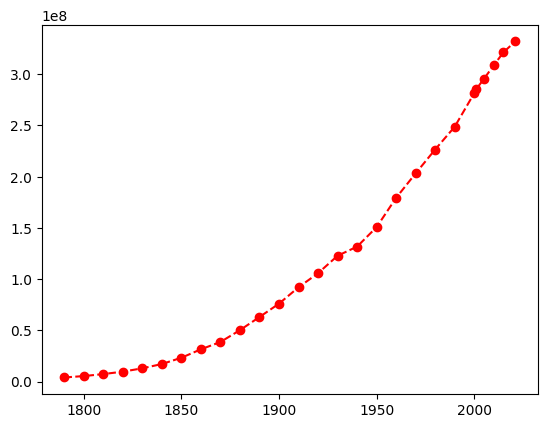

In [200]:
# Draw the original data points
plt.plot(years, pops, 'o--', color='red')
plt.show()

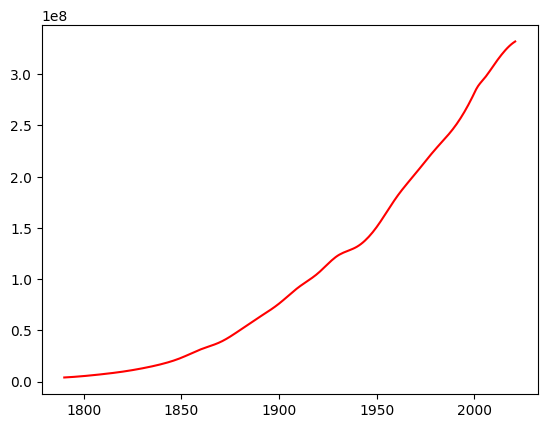

In [201]:
y_f = interp1d(years, pops, 'cubic')

# Create a range of x values to plot over
points = (years.max() - years.min()) + 1
x = np.linspace(years.min(), years.max(), num=points).astype(int)

# Evaluate the polynomial for the new range of x values
y = y_f(x)

y = y.astype(float)

# Draw the interpolating polynomial
plt.plot(x, y, color='red')

# Show the plot
plt.show()

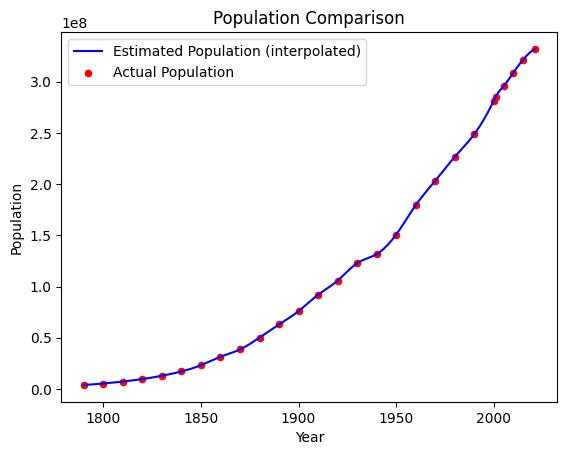

In [202]:
import pandas as pd

# Create the first dataframe
df1 = pd.DataFrame({
    'year': x,
    'pop': y
})

# Create the second dataframe
df2 = pd.DataFrame({
    'year': years, 
    'pop': pops
})

# Left join the two dataframes on the "year" column
df = pd.merge(df1, df2, on='year', how='left', suffixes=["1", "2"])

# create a plot with 2 lines on the same y-axis scale
plt.plot(df['year'], df['pop1'], 'b', label='Estimated Population (interpolated)')
plt.scatter(df['year'], df['pop2'], s=20, c='r', marker='o', label='Actual Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Comparison')
plt.legend()
plt.show()


In [203]:
display(df)

,year,pop1,pop2
0,1790,3.929000e+06,3929000.0
1,1791,4.035352e+06,NaN
2,1792,4.149339e+06,NaN
3,1793,4.270725e+06,NaN
4,1794,4.399278e+06,NaN
...,...,...,...
227,2017,3.256394e+08,NaN
228,2018,3.275174e+08,NaN
229,2019,3.292138e+08,NaN
230,2020,3.307131e+08,NaN


In [204]:
look4year = [1968, 1970, 1999, 2000, 2020, 2021]
for yr in look4year:
    population = y_f(yr)
    print(f"Interpolated population in {yr} = {population}")


Interpolated population in 1968 = 198630827.2848001
Interpolated population in 1970 = 203212000.0
Interpolated population in 1999 = 277502110.11600316
Interpolated population in 2000 = 281416000.0
Interpolated population in 2020 = 330713096.95883644
Interpolated population in 2021 = 332000000.0


To verify the result, we can compare the interpolated population of the USA in the year that's close to the year to estimate. For example, population in 1970 is 203 mios, estimated for 1968 is 198 mio (actual is 200 mio). Population in 2000 is 281 mio and estimated for 199 is 277 mios (the actual is 279 mio). The actual population in the USA in 2021 is 331 millions, estimated is 330.7 mio. The interpolated result is very close to actual result

## Model #2 - Low-order best-fit polynomial
find the coefficients of an appropriate low-order best-fit polynomial. To determine the
reasonable low-order polynomial to use for this, you should compute the divided differences for
the data, and choose the order according to the divided differences entries in which all values
have a magnitude of less than 0.01

In [205]:
def divided_differences(x, y):
    """
    Args:
        x (nparray): data points of x
        y (nparray): data points of y

    Returns:
        a list of numpy arrays, where the i-th array contains the divided differences for the i-th order polynomial.
    """
    n = len(x)
    diffs = [y]
    for i in range(1, n):
        diff = (diffs[i - 1][1:] - diffs[i - 1][:-1]) / (x[i:] - x[:-i])
        diffs.append(diff)
    return diffs

div_diffs = divided_differences(x, y)

# Look for the lowest degree with optimal differences
degrees = []
max_diffs = []
for i in range(len(div_diffs)):
    degrees.append(i)
    max_diff = np.max(np.abs(div_diffs[i]))
    max_diffs.append(max_diff)
    if max_diff < 0.01:
        print("The order of the polynomial should be: ", i)
        degree = i
        break


The order of the polynomial should be:  14


Dataframe table that shows the max divided difference of each degree

In [207]:
div_diffs_df = pd.DataFrame({'degrees': degrees, 'max_diffs': max_diffs})
display(div_diffs_df)

,degrees,max_diffs
0,0,3.320000e+08
1,1,3.913890e+06
2,2,3.446955e+05
3,3,1.099169e+05
4,4,3.021085e+04
5,5,1.007091e+04
6,6,2.372209e+03
7,7,6.394228e+02
8,8,1.290819e+02
9,9,2.775273e+01


In [208]:
# Fit a polynomial of degree 2
coeffs = np.polyfit(years,pops, degree)

# Evaluate the polynomial at 100 equally spaced points between 0 and 5
points = years.max() - years.min() + 1
year_eval = np.linspace(years.min(), years.max(), points)
pop_eval = np.polyval(coeffs, year_eval)

/Users/anhhoang.chu/Documents/genai/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [209]:
print(f"The coefficients based on the best  order of {degree} is:", coeffs)

The coefficients based on the best  order of 14 is: [-6.22490152e-29  6.36512916e-25 -2.14499779e-21  1.23094797e-18
  6.37182542e-15 -2.98358112e-12 -2.42536550e-08 -5.99621617e-06
  8.88431461e-02  8.37347663e+01 -3.21481937e+05 -3.93026747e+08
  1.71687588e+12 -1.75171061e+15  6.08168023e+17]


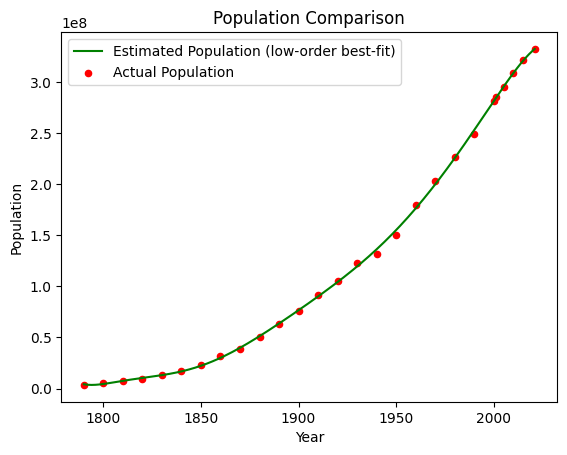

In [210]:
# Create the first dataframe
df1 = pd.DataFrame({
    'year': year_eval,
    'pop': pop_eval
})

# Create the second dataframe
df2 = pd.DataFrame({
    'year': years, 
    'pop': pops
})

# Left join the two dataframes on the "year" column
df = pd.merge(df1, df2, on='year', how='left', suffixes=["1", "2"])

# create a plot with 2 lines on the same y-axis scale
plt.plot(df['year'], df['pop1'], 'g', label='Estimated Population (low-order best-fit)')
plt.scatter(df['year'], df['pop2'], s=20, c='r', marker='o', label='Actual Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Comparison')
plt.legend()
plt.show()

In [211]:
display(df)

,year,pop1,pop2
0,1790.0,4204032.0,3929000.0
1,1791.0,3901056.0,NaN
2,1792.0,3700096.0,NaN
3,1793.0,3587456.0,NaN
4,1794.0,3553920.0,NaN
...,...,...,...
227,2017.0,325105152.0,NaN
228,2018.0,327117568.0,NaN
229,2019.0,329015040.0,NaN
230,2020.0,330794112.0,NaN


In [212]:
look4year = [1968, 1970, 1999, 2000, 2020, 2021]
for yr in look4year:
    pop1 = df.loc[df['year'] == yr]['pop1']
    print(f"Best-fitted population in {yr}: {pop1.iloc[0]}")

Best-fitted population in 1968: 194951808.0
Best-fitted population in 1970: 199840768.0
Best-fitted population in 1999: 278532736.0
Best-fitted population in 2000: 281360256.0
Best-fitted population in 2020: 330794112.0
Best-fitted population in 2021: 332432128.0


To verify the result, we can compare the population of the USA in the year that's close to the year to estimate. For example, population in 1970 is 203 mios, estimated for 1968 is 194 mio (actual is 200 mio). Population in 2000 is 281 mio and estimated for 1999 is 278 mios (the actual is 279 mio). The actual population in the USA in 2020 is 331 millions, estimated is 330.7 mio. The best-fitted result is very close to actual result